# TP4


# Noms et prénoms des membres du groupe: 



*   Rouini Mouna
*   Cherif Meriam
*   Soltane Med Skander



# I. Chargement de l'image de cellules
On se propose tout au long de ce TP d'essayer de manipuler l'image de cellules qu'on a déjà utilisé lors d'un précédent TP.
Nous allons d'abord importer les bibliothèques qui nous seront utiles

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow, get_cmap
#from skimage import data
from PIL import Image, ImageDraw

# Question : 
Importez l'image et assurez-vous qu'elle est bien en niveaux de gris, puis affichez-là.

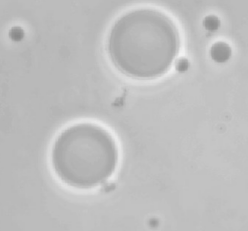

In [3]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('cell_image.png', cv2.IMREAD_GRAYSCALE)

# Display the grayscale image
cv2_imshow(image)


# II. Affichage du spectre d'amplitude

# Question 1
Utilisez la fonction fft.fft2() de numpy pour récupérer les données de l'image dans le domaine fréquentiel.

Le '2' dans fft2() indique que nous utilisons la transformée de Fourrier en 2 dimensions. Son premier argument est l’image d’entrée, qui est en niveaux de gris. Le second argument est optionnel et décide de la taille du tableau de sortie.


/usr/local/lib/python3.10/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


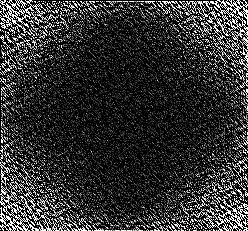

In [50]:
# Perform the Fourier transform using fft.fft2()
freq = np.fft.fft2(image)
cv2_imshow(freq)

# Question 2
Si vous essayez d'afficher l'image, cela ne marchera pas, pourquoi?

Elle ne sera pas visuellement informative car elle contient des valeurs complexes 

# Question 3
Centrez les données autour de 0 en appliquant la fonction fft.fftshift() sur les fréquences.

In [51]:
frequency_domain_centered = np.fft.fftshift(freq)


# Question 4
Calculez le spectre de magnitude. 
Affichez l'image originale et son spectre d'amplitude (en nuances de gris).

On donne le spectre de magnitude par la formule suivante :
magnitude_spectrum = 20*np.log(np.abs(shifted_freq))

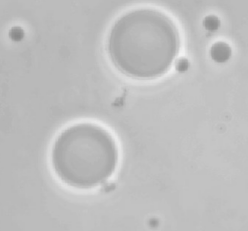

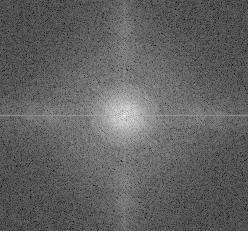

In [9]:
magnitude_spectrum = 20*np.log(np.abs(frequency_domain_centered))
cv2_imshow( image)
cv2_imshow(magnitude_spectrum)


# III. Filtrage fréquentiel : Filtre passe-haut
Nous pouvons maintenant effectuer certaines opérations dans le domaine fréquentiel, comme le filtrage passe-haut et reconstruire l’image après filtrage en utilisant la Transformée de Fourrier inverse.

1. Supprimez les basses fréquences en masquant avec une fenêtre rectangulaire de taille 20x20. 
2. Appliquez le décalage inverse en utilisant ifftshift() (En d'autres termes, inverser l'operation qui a permis de centrer les données autour de 0). 
3. Calculez la FFT inverse en utilisant la fonction ifft2(). Le résultat, encore une fois, sera un chiffre complexe. 
4. Affichez la valeur absolue du résultat.

In [12]:
mask = np.ones_like(frequency_domain_centered)
mask[image.shape[0]//2-10:image.shape[0]//2+10, image.shape[1]//2-10:image.shape[1]//2+10] = 0

filtered_frequency_domain_shifted = frequency_domain_centered * mask


In [14]:
inverse_shifted_frequency_domain = np.fft.ifftshift(filtered_frequency_domain_shifted)

In [15]:
inverse_frequency_domain = np.fft.ifft2(inverse_shifted_frequency_domain)

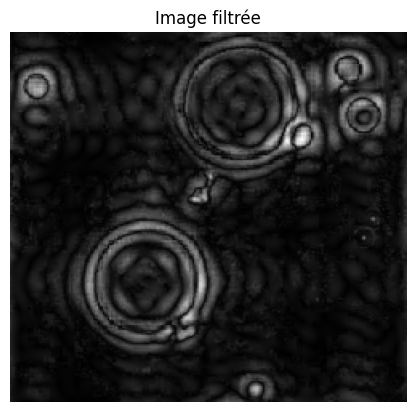

In [18]:
reconstructed_image = np.abs(inverse_frequency_domain)
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.title('Image filtrée')
plt.show()


# IV. Filtrage fréquentiel : Filtre passe-bas
Comme expliqué en cours, un filtre passe bas est le complémentaire d'un filtre pass-haut. 
Nous allons commencer par appliquer un filtre passe-bas rectangulaire. 

# Question 1
1. Commencez par créer une image de 0s (ou de 1 mais vous devrez faire le complémentaire plus tard) de la taille de votre image de cellule. 
2. Mettez-à 1 une fenêtre rectangulaire (au centre de l'image) dont le côté mesure 20 pixels 
3. Affichez le masque

In [19]:
mask = np.zeros_like(image)

In [20]:
window_size = 20
mask[image.shape[0]//2-window_size//2:image.shape[0]//2+window_size//2,
     image.shape[1]//2-window_size//2:image.shape[1]//2+window_size//2] = 1

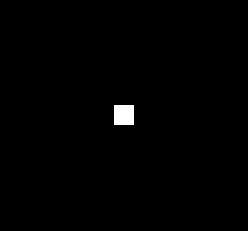

In [23]:
mask = mask * 255
cv2_imshow( mask)


# Question 2
1. Appliquez ce filtre sur le spectre de l'image 
2. Retrouvez comme fait précédemment l'image filtrée par Transformée de Fourrier Inverse.
3. Que remarquez-vous au niveau du résultat, en plus du fait que l'image de sortie soit fortement lissée?

In [25]:
filtered_frequency_domain_shifted = frequency_domain_centered * mask

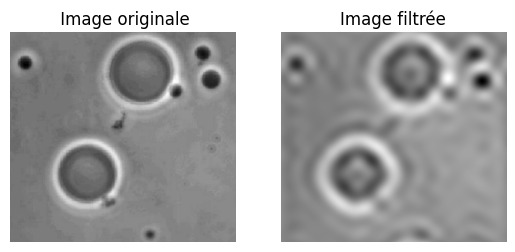

In [26]:
inverse_shifted_frequency_domain = np.fft.ifftshift(filtered_frequency_domain_shifted)
inverse_frequency_domain = np.fft.ifft2(inverse_shifted_frequency_domain)
filtered_image = np.abs(inverse_frequency_domain)
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(' Image originale')

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.title('Image filtrée')

plt.show()


Votre commentaire: 
En utilisant un filtre passe-bas rectangulaire, l'effet du rectangle devient visible sur l'image filtrée. Cela est dû aux bords nets et en forme de rectangle que le filtre crée lors de l'atténuation des hautes fréquences. 


# Question 3
Nous allons maintenant créer un filtre passe-bas circulaire. 
1. Executez le code ci-dessous 
2. Affichez l'image originale et l'image résultante du filtrage.
3. Commentez le résultat en comparant le filtre pass-bas rectangulaire et circulaire.

Voici le code correspondant : 

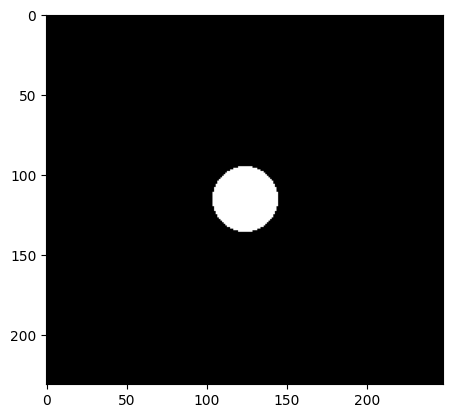

In [39]:
#Créer un filtre passe bas non rectangulaire, mais circulaire
x,y = image.shape[0],image.shape[1]
#size of circle
e_x,e_y=40,40

#Donnez les paramètres de l'ellipse (cercle) que vous souhaitez créer
#Attention: le repère de l'image et d'une figure sont différents : (x,y) devient (y,x)!!!
bbox=((y/2)-(e_y/2),(x/2)-(e_x/2),(y/2)+(e_y/2),(x/2)+(e_x/2))

#Créer l'image noire initiale du masque
low_pass=Image.new("L",(y,x),color=0) #L : single channel mode

#Ajoutez le cercle et le remplir par des 1s
draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)
#Affichez votre image correspondant au masque
imshow(low_pass, cmap=get_cmap('gray'))

#multipliez les 2 images
shift_freq = np.fft.fftshift(np.fft.fft2(image))
LP_filter= np.multiply(shift_freq,low_pass)

#Undo le décalage du spectre et appliquez ifft2
LP_result= np.fft.ifft2(np.fft.ifftshift(LP_filter))
LP_result= np.abs(LP_result)

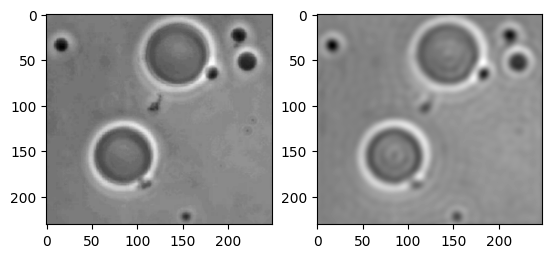

In [40]:
#Affichez l'image
_ , axes= plt.subplots(ncols=2)
axes[0].imshow(image, cmap=plt.get_cmap('gray')) 
axes[1].imshow(LP_result,cmap=plt.get_cmap('gray')) 

Votre commentaire: 
 Le filtre passe-bas circulaire a une réponse en fréquence plus douce que le filtre passe-bas rectangulaire. Cela signifie que le filtre passe-bas circulaire atténue les hautes fréquences plus graduellement que le filtre passe-bas rectangulaire. Avec un filtre passe-bas circulaire, on ne remarque pas clairement la forme du filtre utilisé, car l'effet est plus homogène et progressif.

# V. Détection de contours et de coins

Maintenant, notre objectif est de détecter les contours des cellules en essayant d'appliquer les opérateurs: Sobel et Canny
1. Appliquez d'abord un lissage Gaussien de taille 3x3 à l'aide de la fonction cv2.GaussianBlur(...)
2. Appliquez un filtre de Sobel selon x, selon y, puis selon les 2 directions à la fois (Choisir convenablement les paramètres de la fonction cv2.Sobel()
3. Affichez les résultats de Sobel_x, Sobel_y
4. Appliquez la méthode de Canny cv2.Canny(..). Faites varier les deux seuils d'hystéresis jusqu'a obtenir le meilleur résultat selon vous.
5. Affichez le résulat final de Sobel (selon les 2 directions et après seuillage) et le résultat final de Canny
6. Comparez les résultats


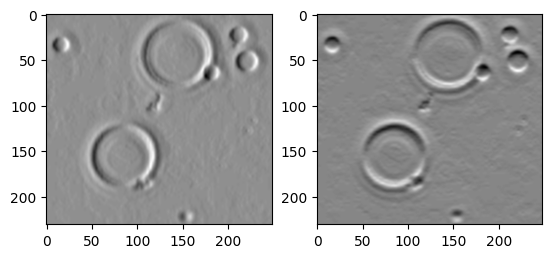

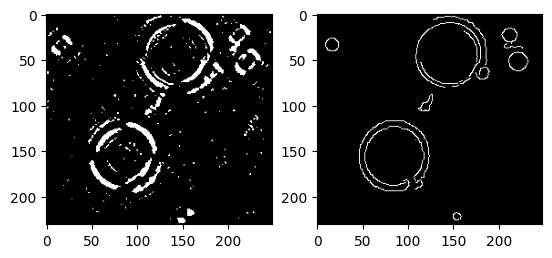

In [49]:
img_blur= cv2.GaussianBlur(image, (3,3) , 0)
sobelx= cv2.Sobel(src=img_blur,ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely= cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy= cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
_ , axes= plt.subplots(ncols=2)
axes[0].imshow(sobelx, cmap=plt.get_cmap('gray')) 
axes[1].imshow(sobely,cmap=plt.get_cmap('gray')) 
#canny edge detection
edges= cv2.Canny(image=img_blur, threshold1=20, threshold2=70)
_ , axes= plt.subplots(ncols=2)
axes[0].imshow(sobelxy>20,cmap=plt.get_cmap('gray')) 
axes[1].imshow(edges,cmap=plt.get_cmap('gray')) 



Votre commentaire: 
On remarque que le filtre Canny donne des résultats de détection de contours plus précis que Sobel. En effet, l'image filtrée par Canny présente des bords plus doux et arrondis car elle utilise une méthode plus sophistiquée pour supprimer le bruit et les contours parasites et détecter les contours plus efficacement et utilise aussi une  technique de seuillage adaptatif qui permet de détecter les contours faibles et forts de manière plus efficace. 